# Assignment 3

In [2]:
# Importing Dependencies
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

import torch
import torch.nn as nn
import torch.distributions as dist
import torch.optim as optim

---

## Question 1 [2.5 Marks]

Approximate the normalization constant for standard normal distribution using Monte Carlo integration. Assume that we only know the numerator term: $ e^{-\frac{x^2}{2}} $ and want to find $I = \int_{-\infty}^{+\infty} e^{-\frac{x^2}{2}} dx$

Monte Carlo integral theory:-

\begin{align}
I &= \int_{a}^{b} f(x) p(x) dx = \mathbb{E}_p[f(x)] \\
& \approx \frac{1}{N} \sum_{i=1}^{N} f(x_i) \\
& \; where \; x_i \sim p(x)
\end{align}

where $p(x)$ is a probability density function.



1. Take p(x) = Uniform(-a, a). Choose the following values of a {0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 3, 5}. Draw 1000 samples for each a and plot the normalizing constant on y-axis for each value of a on x-axis. Draw a horizontal line showing the analytical normalizing constant as ground truth. [1 marks]

So, in the first part, we will use the Uniform distribution as the proposal distribution. Integral for the uniform distribution is given by:

\begin{align}
I &= \int_{-\infty}^{+\infty} f(x) dx \\
& \sim \int_{-a}^{+a} f(x) dx \\
&= 2a \int_{-a}^{a} f(x) \frac{1}{2a} dx \\
&= 2a \int_{-a}^{a} f(x) U(-a,+a) dx \\
&= 2a \; \mathbb{E}_U[f(x)] \\
& \sim \frac{2a}{N} \sum_{i=1}^{N} f(x_i) \\
& \; where \; x_i \sim U(-a,+a)
\end{align}

where $U(-a,+a)$ is the uniform distribution with limits $-a$ and $+a$.

We are making the integral from -a to +a instead of $-\infty$ to $+\infty$ because the integral is peaked around 0, and decays fast outside it. Also, we cannot take a Unifrom distribution from $-\infty$ to $+\infty$ (we can work around this by transforming the function so that its domain is from 0 to 1).



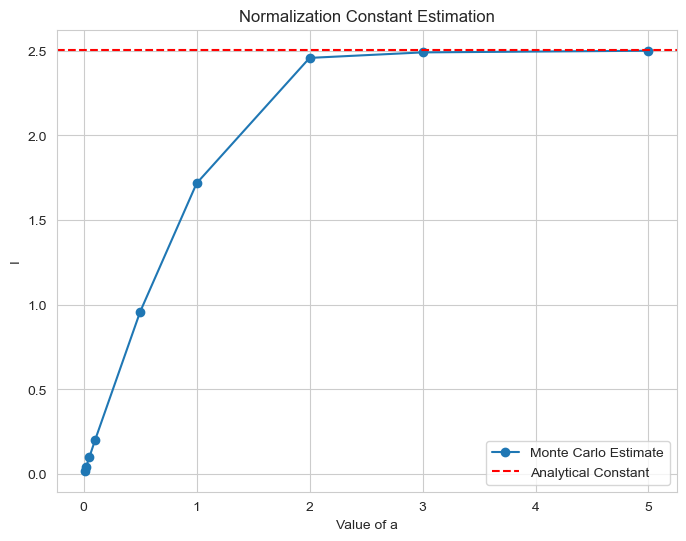

In [47]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Function to approximate (squared exponential)
def f(x):
    return np.exp(-x**2 / 2)

# Analytically calculated I
true_constant = np.sqrt(2 * np.pi)

a_values = [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 3, 5]
num_samples = 1000
monte_carlo_results = []

# Perform Monte Carlo integration for different 'a' values
for a in a_values:
    samples = np.random.uniform(-a, a, num_samples)
    numerator_values = f(samples)
    monte_carlo_estimate = np.mean(numerator_values) * (2 * a)  # Multiply by the range
    monte_carlo_results.append(monte_carlo_estimate)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(a_values, monte_carlo_results, marker='o', label='Monte Carlo Estimate')
plt.axhline(true_constant, color='r', linestyle='--', label='Analytical Constant')
plt.xlabel('Value of a')
plt.ylabel('I')
plt.title('Normalization Constant Estimation')
plt.legend()
plt.show()

2) Estimate I using Monte Carlo integration for varying number of MC samples {10, 100, 10^3 , 10^4, 10^5} for a=4. For each value of number of MC samples, repeat the experiment 10 times and plot the mean estimate with plt.plot and the standard deviation of the estimate using plt.fill_between. [1 mark]

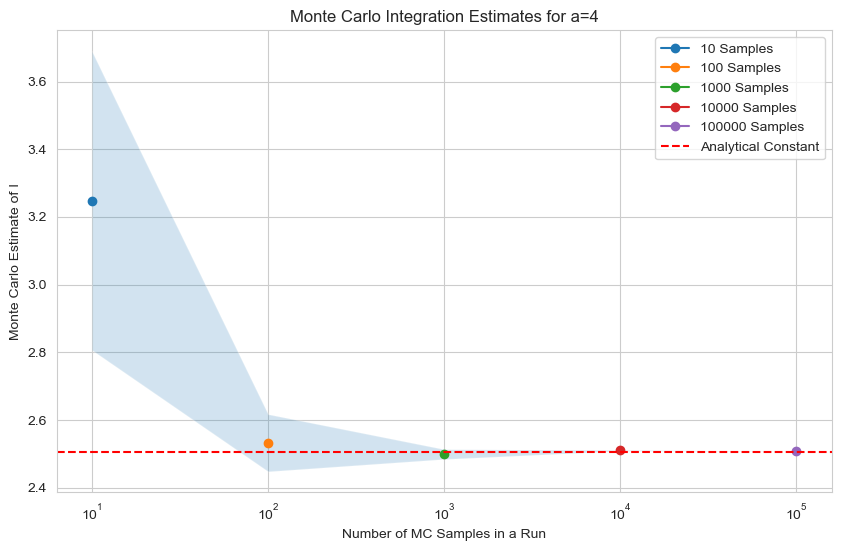

In [54]:
np.random.seed(123)

# Number of sampling runs
num_sr = 10

# Values for number of MC samples
mc_samples = [10, 100, 1000, 10000, 100000]

monte_carlo_estimates = []
monte_carlo_vars = []

# Perform experiments for varying number of MC samples for a=4
for num_samples in mc_samples:
    mc_results = []
    for _ in range(num_sr):
        samples = np.random.uniform(-4, 4, num_samples)
        numerator_values = f(samples)
        mc_estimate = np.mean(numerator_values) * (2*4)  # Multiply by the range
        mc_results.append(mc_estimate)
    monte_carlo_estimates.append(np.array(mc_results).mean())
    monte_carlo_vars.append(np.array(mc_results).var())

# Plotting the results
plt.figure(figsize=(10, 6))

mc_mean = np.array(monte_carlo_estimates)
mc_std = np.array(monte_carlo_vars)

for i, num_samples in enumerate(mc_samples):
    plt.plot(num_samples, mc_mean[i], marker='o', label=f'{num_samples} Samples')

plt.fill_between(mc_samples, mc_mean - mc_std, mc_mean + mc_std, alpha=0.2)

plt.axhline(true_constant, color='r', linestyle='--', label='Analytical Constant')
plt.xlabel('Number of MC Samples in a Run')
plt.ylabel('Monte Carlo Estimate of I')
plt.xscale('log')
plt.title('Monte Carlo Integration Estimates for a=4')
plt.legend()
plt.show()

How the values of mean and the variance decreases with number of samples

In [57]:
import pandas as pd
df = pd.DataFrame({'MC Samples': mc_samples, 'MC Mean': mc_mean, 'MC Std': mc_std})
df

,MC Samples,MC Mean,MC Std
0,10,3.247927,0.441198
1,100,2.532797,0.084466
2,1000,2.499226,0.014490
3,10000,2.510336,0.001166
4,100000,2.507928,0.000072


3) Repeat (i.) using scipy.integrate.quad and compare it with the estimates obtained in (i.) using a similar plot used in (i.). [0.5 mark]

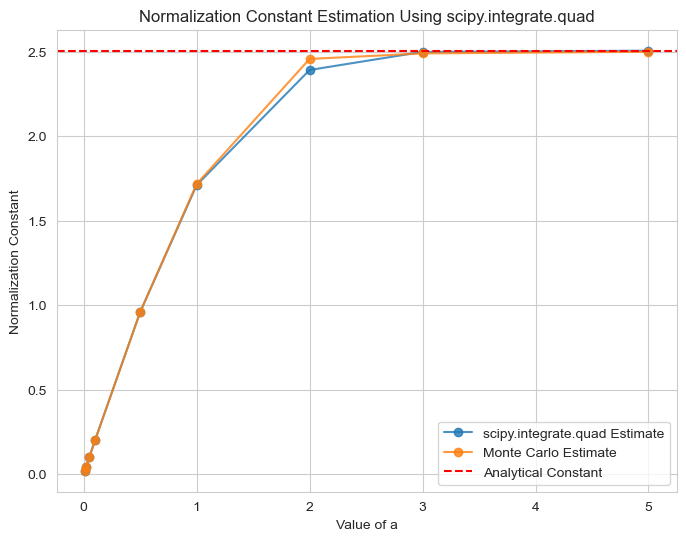

In [60]:
from scipy.integrate import quad

def f(x):
    return np.exp(-x**2 / 2)

# True I using scipy.integrate.quad
true_constant, _ = quad(f, -np.inf, np.inf)

a_values = [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 3, 5]

quad_constants = []

# Using scipy.integrate.quad for different 'a' values
for a in a_values:
    result, _ = quad(lambda x: f(x), -a, a)
    quad_constants.append(result)  

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(a_values, quad_constants, marker='o', label='scipy.integrate.quad Estimate', alpha = 0.8)
plt.plot(a_values, monte_carlo_results, marker='o', label='Monte Carlo Estimate', alpha = 0.8)
plt.axhline(true_constant, color='r', linestyle='--', label='Analytical Constant')
plt.xlabel('Value of a')
plt.ylabel('Normalization Constant')
plt.title('Normalization Constant Estimation Using scipy.integrate.quad')
plt.legend()
plt.show()


---

## Question 2 [1.5 Marks]

Inverse Sampling for Cauchy Distribution.


1. Analytically derive the Inverse CDF from the CDF of the Cauchy distribution. [0.5 mark]

The cauchy distribution is given as: 

$$
f(x) = \frac{1}{\pi \gamma (1+(\frac{x-x_0}{\gamma})^2)}
$$ 

We can calculate the CDF:

\begin{align}
F(x) &= \int_{-\infty}^{x} \frac{1}{\pi \gamma (1+(\frac{x-x_0}{\gamma})^2)} dx \\
&= \frac{1}{\pi \gamma} \int_{-\infty}^{x} \frac{1}{1+(\frac{x-x_0}{\gamma})^2} dx \\
&= \frac{1}{\pi \gamma} \left[ \gamma \arctan(\frac{x-x_0}{\gamma}) \right]_{-\infty}^{x} \\
&= \frac{1}{\pi} \left[ \arctan(\frac{x-x_0}{\gamma}) \right]_{-\infty}^{x} \\
&= \frac{1}{\pi} \left[ \arctan(\frac{x-x_0}{\gamma}) - \arctan(-\infty) \right] \\
&= \frac{1}{\pi} \left[ \arctan(\frac{x-x_0}{\gamma}) + \frac{\pi}{2} \right] \\
&= \frac{1}{2} + \frac{1}{\pi} \arctan(\frac{x-x_0}{\gamma})
\end{align}

Hense the inverse cdf (Quantile Function) will be:

\begin{align}
F^{-1}(p) &= x_0 + \gamma \tan(\pi(p-\frac{1}{2}))
\end{align}


2. Draw samples from the Cauchy distribution (loc ($x_0$) = 0 , scale ($\gamma$) = 1) with inverse CDF sampling. 

Use the inverse CDF derived in (i.). While generating samples from the uniform distribution, restrict the samples to be between (0.05 and 0.95) to avoid numerical instability. Verify that drawn samples are correct by plotting the kernel density estimation (empirical pdf) with sns.kdeplot (sns stands for the seaborn library) along with pdf obtained with dist.log_prob, where dist is torch.distributions.Cauchy(loc=0, scale=1) [0.5 mark]

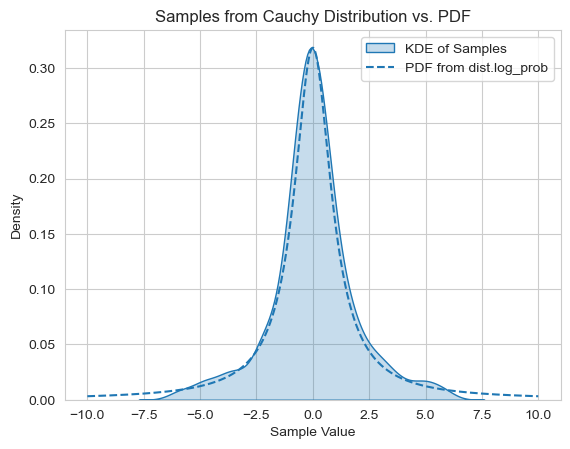

In [61]:
np.random.seed(123)

# Inverse CDF for Cauchy distribution for (0, 1)
def cauchy_inverse_cdf(u):
    return np.tan(np.pi * (u - 0.5))

# Generating Unifrom Samples (1000 samples)
uniform_samples = np.random.uniform(0.05, 0.95, 1000)

# Using the inverse CDF
cauchy_samples = cauchy_inverse_cdf(uniform_samples)

# KDE Plot of the generated samples
sns.kdeplot(cauchy_samples, label='KDE of Samples', fill=True)

# PDF obtained with torch.distributions.Cauchy
dist = torch.distributions.Cauchy(loc=0, scale=1)
x = torch.linspace(-10, 10, 1000)
pdf = torch.exp(dist.log_prob(x))
plt.plot(x.numpy(), pdf.numpy(), label='PDF from dist.log_prob', linestyle='--')

plt.xlabel('Sample Value')
plt.ylabel('Density')
plt.title('Samples from Cauchy Distribution vs. PDF')
plt.legend()
plt.show()


The inverse Cdf sample looks very similar to the cauchy distribution obtained from torch distributions

3. Repeat (ii.) using inverse CDF from torch.distributions.Cauchy. You can access the inverse CDF at dist.icdf where dist is an instance of torch.distributions.Cauchy. [0.5 mark]

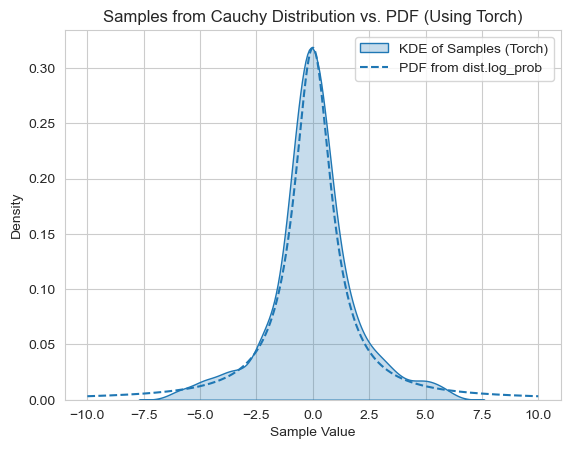

In [64]:
np.random.seed(123)

# Generating Unifrom Samples (1000 samples)
uniform_samples = np.random.uniform(0.05, 0.95, 1000)

# Using the inverse CDF from torch.distributions.Cauchy
dist = torch.distributions.Cauchy(loc=0, scale=1)
cauchy_samples_torch = dist.icdf(torch.tensor(uniform_samples))

# KDE plot of the generated samples form dist.icdf
sns.kdeplot(cauchy_samples_torch.numpy(), label='KDE of Samples (Torch)', fill=True)

# PDF obtained with torch.distributions.Cauchy
x = torch.linspace(-10, 10, 1000)
pdf = torch.exp(dist.log_prob(x))
plt.plot(x.numpy(), pdf.numpy(), label='PDF from dist.log_prob', linestyle='--')

plt.xlabel('Sample Value')
plt.ylabel('Density')
plt.title('Samples from Cauchy Distribution vs. PDF (Using Torch)')
plt.legend()
plt.show()


This KDE plot also looks very similar to the cauchy distribution obtained from torch distributions, maybe torch uses the same inverse cdf method as we are. (As it is quite)

---

## Question 3 [1.5 Marks]

Rejection sampling:

1) Sample the unnormalized distribution shown in the code below using rejection sampling. Use Normal(loc=5, scale=5), Uniform(-15, 15), and Laplace distribution(loc=5, scale=5) as the proposal distributions. Report the accepance ratios for each proposal distribution (You may choose suitable Multiplier value (M) while considering the support -15 < x < 15). [1 mark]


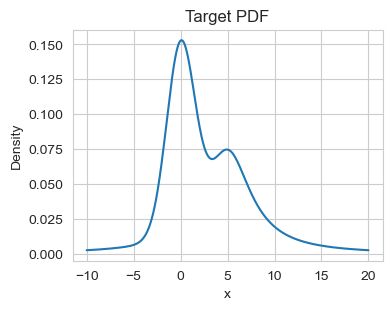

In [69]:
import torch.distributions as dist

def target_pdf(x):
    gaussian_pdf = dist.Normal(0, 1.5).log_prob(x).exp()
    cauchy_pdf = dist.Cauchy(5, 3).log_prob(x).exp()
    return 0.5 * gaussian_pdf + 0.7 * cauchy_pdf

# Plotting the target PDF
plt.figure(figsize=(4, 3))
x = torch.linspace(-10, 20, 1000)
plt.plot(x.numpy(), target_pdf(x).numpy())
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Target PDF')
plt.show()

In [92]:
torch.rand(1)

tensor([0.1197])

In [146]:
torch.manual_seed(120)

# Finding M for the proposal distribution
def get_M(proposal_dist, target_pdf):
    i = 0
    M = 0.2
    checkpoints = proposal_dist.sample((50,))
    while(True):
        for cp in checkpoints:
            if ( M*proposal_dist.log_prob(cp).exp() < target_pdf(cp)):
                M = max(M, target_pdf(cp) / proposal_dist.log_prob(cp).exp())
                continue
        break
    return M

# Proposal Distribution:-
proposal_normal = dist.Normal(5, 5)
M_normal = get_M(proposal_normal, target_pdf)
proposal_uniform = dist.Uniform(-15, 15)
M_uniform = get_M(proposal_uniform, target_pdf)
proposal_laplace = dist.Laplace(5, 5)
M_laplace = get_M(proposal_laplace, target_pdf)

# Acceptance-Rejection Sampling
def accept_reject_sampling(proposal_dist, target_pdf, M, num_samples):
    samples = []
    for i in range(num_samples):
        x = proposal_dist.sample()
        u = torch.rand(1)
        if (u < target_pdf(x) / (M * proposal_dist.log_prob(x).exp())):
            samples.append(x)
    return torch.stack(samples)

# Generating 1000 samples
num_samples = 1000 #2000 
samples_normal = accept_reject_sampling(proposal_normal, target_pdf, M_normal, num_samples)
samples_uniform = accept_reject_sampling(proposal_uniform, target_pdf, M_uniform, num_samples)
samples_laplace = accept_reject_sampling(proposal_laplace, target_pdf, M_laplace, num_samples)

# Tabulating the acceptance ration, M for all the distributions using pandas df
df = pd.DataFrame({'Proposal Distribution': ['Normal', 'Uniform', 'Laplace'],
                'Acceptance Ratio': [len(samples_normal) / num_samples, len(samples_uniform) / num_samples, 
                                     len(samples_laplace) / num_samples],
                'M': [M_normal.item(), M_uniform.item(), M_laplace.item()]})
df

,Proposal Distribution,Acceptance Ratio,M
0,Normal,0.352,3.270674
1,Uniform,0.226,4.499060
2,Laplace,0.266,4.250294


2) Create and compare plots showing the target distribution (taget_pdf function), proposal distribution (pdf via log_prob method), scaled proposal distribution (scaled by M), and pdf of final normalized target distribution (empirical pdf) using sns.kdeplot. [0.5 mark]

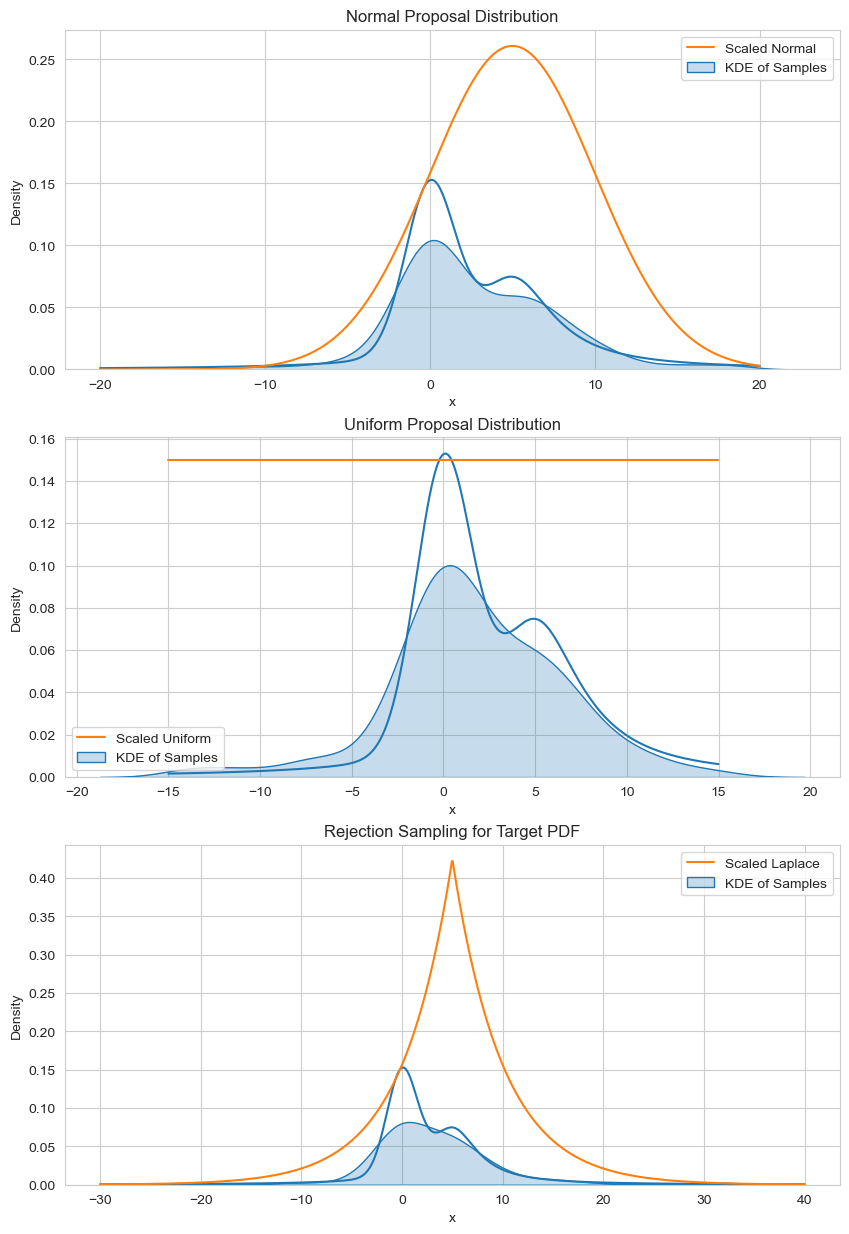

In [147]:
# Plotting a (1,3) plot for the three samples generated

# fig, ax = plt.subplots(1, 3, figsize=(15, 4))
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
x = torch.linspace(-20, +20, 1000)
ax[0].plot(x.numpy(), target_pdf(x).numpy())
ax[0].plot(x.numpy(), M_normal * proposal_normal.log_prob(x).exp().numpy(), label = "Scaled Normal")
sns.kdeplot(samples_normal.numpy(), ax=ax[0], label='KDE of Samples', fill=True)
ax[0].set_xlabel('x')
ax[0].set_ylabel('Density')
ax[0].set_title('Normal Proposal Distribution')
ax[0].legend()

x = torch.linspace(-15, +15, 1000)
ax[1].plot(x.numpy(), target_pdf(x).numpy())
ax[1].plot(x[:-1].numpy(), M_uniform * proposal_uniform.log_prob(x[:-1]).exp().numpy(), label = "Scaled Uniform")
sns.kdeplot(samples_uniform.numpy(), ax=ax[1], label='KDE of Samples', fill=True)
ax[1].set_xlabel('x')
ax[1].set_ylabel('Density')
ax[1].set_title('Uniform Proposal Distribution')
ax[1].legend()

x = torch.linspace(-30, +40, 1000)
ax[2].plot(x.numpy(), target_pdf(x).numpy())
ax[2].plot(x.numpy(), M_laplace * proposal_laplace.log_prob(x).exp().numpy(), label = "Scaled Laplace")
sns.kdeplot(samples_laplace.numpy(), ax=ax[2], label='KDE of Samples', fill=True)
ax[2].set_xlabel('x')
ax[2].set_ylabel('Density')
ax[2].set_title('Laplace Proposal Distribution')
ax[2].legend()

plt.title('Rejection Sampling for Target PDF')
plt.show()

---

## Question 4 [3.5 Marks]

We want to perform classification with the following Neural Network which returns logits for the cross-entropy loss:

1) What are the total number of parameters in this model? Apply $ \mathcal{N}(0,1) $ 
 prior on all the parameters of the neural network and find MAP estimate of parameters and plot the predicted probability surface on a dense grid along with data (see this example for code reference). You may choose the appropriate limits for the grid to cover the data with some additional margin. [0.5 mark]

In [4]:
# ! pip install git+https://github.com/AdamCobb/hamiltorch

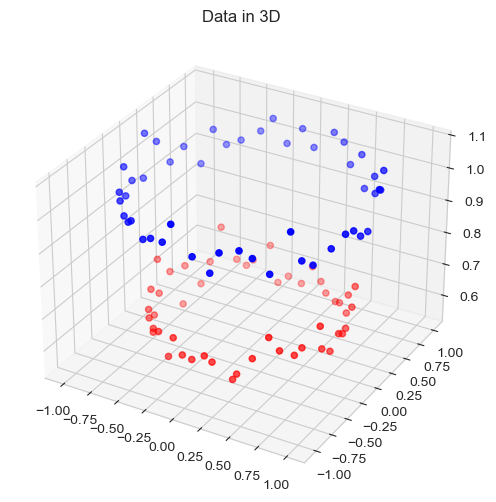

In [19]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, noise=0.02, random_state=42)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# # Make 3d plot
# from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 0]**2 + X[:, 1]**2, c=y, cmap='bwr')
ax.set_title('Data in 3D')
plt.show()

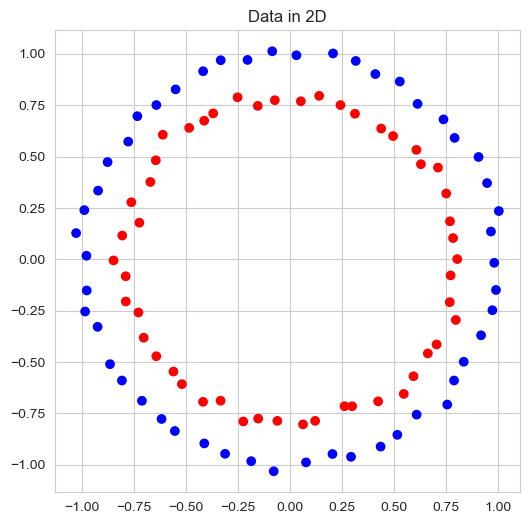

In [20]:
# Plot the data in 2d
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title('Data in 2D')
plt.show()

In [21]:
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)
model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [22]:
# Total number of parameters
num_params = sum(p.numel() for p in model.parameters())
print(f"Total Number of Parameters: {num_params}")

Total Number of Parameters: 33


In [23]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0300, -0.1408],
         [-0.3931,  0.0459],
         [ 0.6570,  0.2723],
         [ 0.1828, -0.4868],
         [-0.2003,  0.6577],
         [-0.6419, -0.1345],
         [-0.3848, -0.5091],
         [-0.0180,  0.4837]], requires_grad=True),
 Parameter containing:
 tensor([-0.0376, -0.6954, -0.3318,  0.5541, -0.4172,  0.2209, -0.2334,  0.2190],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.2115,  0.1130, -0.0960,  0.0964, -0.0387, -0.3360,  0.3087, -0.2779]],
        requires_grad=True),
 Parameter containing:
 tensor([0.2241], requires_grad=True)]

In [24]:
log_prior = 0
for param in model.parameters():
    print(param.shape)
    log_prior += dist.Normal(0, 1).log_prob(param).sum()
log_prior.dtype

torch.Size([8, 2])
torch.Size([8])
torch.Size([1, 8])
torch.Size([1])


torch.float32

In [25]:
logits = model(X_tensor)
print(logits.shape)
print(logits[:5])
log_likelihood = dist.Bernoulli(logits=logits).log_prob(y_tensor.unsqueeze(1)).sum()
print(log_likelihood)

log_likelihood = torch.nn.functional.binary_cross_entropy_with_logits(logits, y_tensor.unsqueeze(1) )#, reduction='sum')
print(log_likelihood)

torch.Size([100, 1])
tensor([[ 0.2039],
        [ 0.1515],
        [-0.0775],
        [ 0.3312],
        [ 0.3420]], grad_fn=<SliceBackward0>)
tensor(-69.4782, grad_fn=<SumBackward0>)
tensor(0.6948, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [26]:
def log_likelihood(model, inputs, outputs):
    logits = model(inputs)
    # log_likelihood = torch.nn.functional.binary_cross_entropy_with_logits(logits, output)
    log_likelihood = dist.Bernoulli(logits=logits).log_prob(outputs.unsqueeze(1)).sum()
    
    # (0,1) normal prior for all model parameters
    log_prior = 0
    for param in model.parameters():
        log_prior += dist.Normal(0, 1).log_prob(param).sum()
    
    return -(log_likelihood + log_prior)

In [27]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop to find MAP estimate
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = log_likelihood(model, X_tensor, y_tensor)
    # loss = criterion(outputs, y_tensor.unsqueeze(1))
    loss.backward()
    optimizer.step()

# MAP estimate of parameters
map_estimate = [param.data for param in model.parameters()]
print("MAP Estimate of Parameters:")
for map in map_estimate:
    print(map)


MAP Estimate of Parameters:
tensor([[-0.2282,  1.1291],
        [ 0.0142, -0.0046],
        [ 1.7876, -0.4219],
        [ 0.0955, -0.0298],
        [-0.7783,  1.2275],
        [-1.3475, -1.2320],
        [ 0.2317, -0.9109],
        [ 0.4933,  1.0081]])
tensor([-0.1854,  0.2076, -0.0581,  1.3876, -0.1802, -0.0698, -0.1872, -0.1687])
tensor([[-1.1665,  0.2069, -1.8366,  1.3914, -1.4647, -1.8264, -0.9581, -1.1341]])
tensor([0.9968])


/Users/gaurav/opt/anaconda3/envs/pml/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


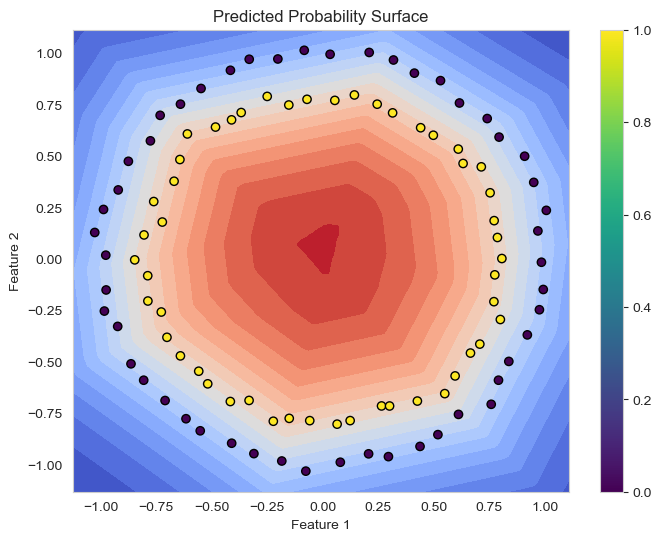

In [28]:
# Creating a dense grid for predicted probability surface
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_range = torch.linspace(x_min, x_max, 100)
y_range = torch.linspace(y_min, y_max, 100)
xx, yy = torch.meshgrid(x_range, y_range)
grid_points = torch.stack([xx.reshape(-1), yy.reshape(-1)], dim=1)

# Calculate predicted probability surface using MAP estimate
with torch.no_grad():
    logits = model(grid_points)
    predicted_prob = torch.sigmoid(logits).reshape(xx.shape).numpy()

# Plot the predicted probability surface
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predicted_prob, levels=20, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', linewidths=1)
plt.title('Predicted Probability Surface')
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

---
4. Sample parameters from the posterior distribution. Use these parameters to obtain the predictive posterior with Monte Carlo sampling on a uniform 2d grid. 

Plot mean and standard deviation surfaces side-by-side with something similar to plt.subplots(). What are your observations? [1 mark]

In [ ]:
# Making a 3D matrix and calculating the values of the predicted model at many points
# The
samples = 20
x_range = torch.linspace(-1.0, +1.0, 100)
y_range = torch.linspace(-1.0, +1.0, 100)
Values = np.zeros(x_range.shape[0], y_range.shape[0], samples)

In [57]:
import hamiltorch
torch.random.manual_seed(123)

# Initial state
MAP_params = hamiltorch.util.flatten(model)
x0 = torch.randn(len(MAP_params))
num_samples = 50
step_size = 0.3
num_steps_per_sample = 5
hamiltorch.set_random_seed(123)

new_model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

# This definitely has some problem
def log_posterior(flat_params, Model):
    params_list = hamiltorch.util.unflatten(Model, flat_params)
    hamiltorch.util.update_model_params_in_place(Model, params_list)
        
    logits = Model(X_tensor)
    log_likelihood = dist.Bernoulli(logits=logits).log_prob(y_tensor.unsqueeze(1)).sum()

    log_prior = torch.tensor(0.)
    for param in Model.parameters():
        log_prior += dist.Normal(0, 1).log_prob(param).sum()
    
    return -(log_likelihood + log_prior)

params_hmc = hamiltorch.sample(log_prob_func=lambda x: log_posterior(x, new_model), params_init=x0,  
                               num_samples=num_samples, step_size=step_size, 
                               num_steps_per_sample=num_steps_per_sample)


Sampling (Sampler.HMC; Integrator.IMPLICIT)


Time spent  | Time remain.| Progress             | Samples | Samples/sec


RuntimeError: One of the differentiated Tensors appears to not have been used in the graph. Set allow_unused=True if this is the desired behavior.

2. What is the expected size of the Hessian matrix? Compute Full Hessian and invert it to get the covariance matrix. Visualize the heatmap of this covariance matrix with seaborn or matplotlib. A valid covariance matrix is always positive semi-definite (PSD). Check if the obtained covariance matrix is PSD. [1.5 marks]

The expected size of the hessian matrix is 33X33 as there are 33 parameters in the model.

In [29]:
import hamiltorch
from torch.autograd.functional import hessian

def log_posterior(flat_params):
    new_model = nn.Sequential(
        nn.Linear(2, 8),
        nn.ReLU(),
        nn.Linear(8, 1)
    )
    params_list = hamiltorch.util.unflatten(new_model, flat_params)
    hamiltorch.util.update_model_params_in_place(new_model, params_list)
        
    logits = new_model(X_tensor)
    log_likelihood = dist.Bernoulli(logits=logits).log_prob(y_tensor.unsqueeze(1)).sum()
    # print(log_likelihood)
    log_prior = torch.tensor(0.)
    for param in new_model.parameters():
        log_prior += dist.Normal(0, 1).log_prob(param).sum()
    # print(log_prior)
    
    return -(log_likelihood + log_prior)

MAP_params = hamiltorch.util.flatten(model)
Hessian = hessian(log_posterior, MAP_params)
print(Hessian)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [30]:
# Numerically calculating the Gradient

gradient = torch.autograd.functional.jacobian(log_posterior, MAP_params)
gradient # Also 0

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
gradients = torch.zeros((MAP_params.shape[0]))
print(gradients.shape)

for i in range(MAP_params.shape[0]):
    tbadded = torch.zeros((MAP_params.shape[0]))
    tbadded[i] = 0.0001
    new_params = MAP_params + tbadded
    # print(new_params.shape)
    gradients[i] = (log_posterior(new_params) - log_posterior(MAP_params)) / 0.0001
gradients

torch.Size([33])


tensor([ 0.0000,  0.1526,  0.0763,  0.0763,  0.3052,  0.3815,  0.0000,  0.0000,
        -0.1526,  0.0000, -0.1526,  0.3052,  0.0000,  0.1526,  0.1526,  0.1526,
         0.4578,  0.0000,  0.0000, -0.1526, -0.1526, -0.1526, -0.2289,  0.4578,
         0.0000,  0.0000,  0.0000, -0.1526,  0.0000,  0.0763,  0.0763,  0.0000,
        -0.1526], grad_fn=<CopySlices>)

In [43]:
# Diagonal Hessian:-

diagonal_hessian = torch.zeros((MAP_params.shape[0]), (MAP_params.shape[0]))
print(diagonal_hessian.shape)

for i in range(MAP_params.shape[0]):
    tbadded = torch.zeros((MAP_params.shape[0]))
    eps = 1e-4
    tbadded[i] = eps
    # print(tbadded)
    new_params = MAP_params + tbadded
    # print(new_params.shape)
    # gradients[i] = (log_posterior(new_params) - log_posterior(MAP_params)) / 0.0001
    diagonal_hessian[i,i] = (log_posterior(MAP_params+tbadded) + log_posterior(MAP_params-tbadded) - 2*log_posterior(MAP_params) ) / eps**2
    # print(diagonal_hessian[i,i])
diagonal_hessian

torch.Size([33, 33])


tensor([[1525.8789,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000],
        [   0.0000, 1525.8789,    0.0000,  ...,    0.0000,    0.0000,
            0.0000],
        [   0.0000,    0.0000, 1525.8789,  ...,    0.0000,    0.0000,
            0.0000],
        ...,
        [   0.0000,    0.0000,    0.0000,  ..., 1525.8789,    0.0000,
            0.0000],
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000, 1525.8789,
            0.0000],
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
         1525.8789]], grad_fn=<CopySlices>)

In [61]:
from torch.autograd import grad
gradf = grad(log_posterior, MAP_params)

TypeError: 'function' object is not iterable

In [45]:
type(MAP_params)

torch.Tensor

In [44]:
Hessian = hessian(log_posterior, MAP_params)
Hessian

tensor(-52.3033, grad_fn=<SumBackward0>)
tensor(-44.7286, grad_fn=<AddBackward0>)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [59]:
log_posterior(MAP_params)

tensor(97.0319, grad_fn=<NegBackward0>)

In [52]:
# make a tensor of size MAP_params, but with all ones
eps = 1e-4
ones = torch.ones(MAP_params.size())
log_posterior(MAP_params+eps*ones)

tensor(-52.3040, grad_fn=<SumBackward0>)
tensor(-44.7280, grad_fn=<AddBackward0>)


tensor(97.0320, grad_fn=<NegBackward0>)

In [27]:
MAP_params

tensor([-0.0704, -0.1110, -0.4203,  1.7943, -0.0653, -0.1022,  0.5622, -0.7182,
        -0.5614, -0.8931, -0.7504, -1.1863,  1.7187, -0.0750, -1.2813,  0.1522,
         0.9618, -0.3021,  0.8878, -0.0782, -0.0351, -0.0492, -0.1719, -0.3209,
         0.9707, -1.8673,  0.8960, -0.9164, -1.0545, -1.4044, -1.7288, -1.3289,
         0.9910], grad_fn=<CatBackward0>)

In [33]:
new_model = nn.Sequential(
        nn.Linear(2, 8),
        nn.ReLU(),
        nn.Linear(8, 1)
    )
list(new_model.parameters())

[Parameter containing:
 tensor([[-0.2987, -0.1258],
         [-0.4679, -0.4049],
         [ 0.2134, -0.1529],
         [-0.4089,  0.2514],
         [ 0.3362,  0.4377],
         [-0.5749,  0.5637],
         [ 0.3279,  0.2572],
         [ 0.0062, -0.6567]], requires_grad=True),
 Parameter containing:
 tensor([-0.1033, -0.1590, -0.2360,  0.5629, -0.0479, -0.5458, -0.4918,  0.4275],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.2137,  0.2605, -0.2264, -0.1766, -0.2092, -0.2664, -0.3509, -0.1217]],
        requires_grad=True),
 Parameter containing:
 tensor([0.3321], requires_grad=True)]

In [34]:
params_list = hamiltorch.util.unflatten(new_model, MAP_params)
hamiltorch.util.update_model_params_in_place(new_model, params_list)
list(new_model.parameters())

[Parameter containing:
 tensor([[-0.0704, -0.1110],
         [-0.4203,  1.7943],
         [-0.0653, -0.1022],
         [ 0.5622, -0.7182],
         [-0.5614, -0.8931],
         [-0.7504, -1.1863],
         [ 1.7187, -0.0750],
         [-1.2813,  0.1522]], requires_grad=True),
 Parameter containing:
 tensor([ 0.9618, -0.3021,  0.8878, -0.0782, -0.0351, -0.0492, -0.1719, -0.3209],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.9707, -1.8673,  0.8960, -0.9164, -1.0545, -1.4044, -1.7288, -1.3289]],
        requires_grad=True),
 Parameter containing:
 tensor([0.9910], requires_grad=True)]

In [35]:
logits = new_model(X_tensor)
log_likelihood = dist.Bernoulli(logits=logits).log_prob(y_tensor.unsqueeze(1)).sum()
log_likelihood

tensor(-52.3033, grad_fn=<SumBackward0>)

In [29]:
new_model = nn.Sequential(
        nn.Linear(2, 8),
        nn.ReLU(),
        nn.Linear(8, 1)
    )
params_list = hamiltorch.util.unflatten(new_model, MAP_params)

logits = model(X_tensor)
log_likelihood = dist.Bernoulli(logits=logits).log_prob(y_tensor.unsqueeze(1)).sum()
log_likelihood

tensor(-52.3033, grad_fn=<SumBackward0>)

In [31]:
log_prior = 0
for param in model.parameters():
    log_prior += dist.Normal(0, 1).log_prob(param).sum()
log_prior

tensor(-44.7286, grad_fn=<AddBackward0>)

In [26]:
log_posterior(MAP_params)

tensor(inf, grad_fn=<ExpBackward0>)

In [25]:
Hessian

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])